# Part Two - Prosper Loan Data Exploration
## by Alex Kakai

## Investigation Overview

> The main purposes of this project is to summarize the characteristics of  variables that can affect the loan status and repayment and to get some ideas about the  relationships among multiple variables using summary statistics and data  visualizations.
 
## Dataset Overview
> This data set contains loans data from Prosper, an America’s first marketplace lending platform, with more 9 billion dollars in disbursed loans. The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit  history, latest payment information and many others.

## Key Insights
> Prospers targets majorly clients that are employed or in full time employed, majority of their clients have at least an income.

> Home owners have a slight edge against none home owners, for loans with longer repayment terms, home owners get averagely 2000 dollars more than non home owners.

> Its cheaper to take bigger loans with long repayment plan as compared to shorter loans with short repayment plans which are quite expensive because higher interest rates are applied.

> Clients taking bigger loans prefer longer payment plans while smaller loans they prefer short repayment plans.

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # default='warn'

base_color = sns.color_palette()[0]

In [18]:
# load in the dataset into a pandas dataframe
#Loading the dataset
prosperLoanData = pd.read_csv(r"E:\New folder\dataverse_files\prosperLoanData.csv")
#Dropping columns that have more than 10% of row with missing data
cols = [c for (c, v) in prosperLoanData.isnull().sum().iteritems() if v > prosperLoanData.shape[0]*0.1]
prosperLoanData.drop(columns = cols, inplace = True)
#Dropping of duplicates
prosperLoanData.drop_duplicates(subset =['ListingKey'], keep = 'first', inplace = True)
#Calculating the interquartile range for both the LoanOriginalAmount & MonthlyLoanPayment
prosperLoanData_iqr = prosperLoanData[['LoanOriginalAmount','MonthlyLoanPayment']]
Q1 =prosperLoanData_iqr.quantile(0.25)
Q3 = prosperLoanData_iqr.quantile(0.75)
IQR = Q3 - Q1
#Dropping rows which are above and below the interquartile range + 1.5
prosperLoanData_iqr_clean = prosperLoanData_iqr[~((prosperLoanData_iqr < (Q1 - 1.5 * IQR)) | (prosperLoanData_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]
#Merging the transformed columns back to the main dataset
prosperLoanData[['LoanOriginalAmount','MonthlyLoanPayment']] = prosperLoanData_iqr_clean
#dropping all rows with missing data after transformations
prosperLoanData.dropna(inplace=True)
#Changing Not displayed to Not employed
prosperLoanData['IncomeRange'].replace('Not displayed', 'Not employed', inplace = True)
#Convert the "IncomeRange" column from a plain object type into an ordered categorical type
salary_classes = ['Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
sclasses = pd.api.types.CategoricalDtype(ordered=True, categories=salary_classes)
prosperLoanData['IncomeRange'] = prosperLoanData['IncomeRange'].astype(sclasses);

## LoanOriginalAmount Vs Term

> Relationship between LoanOriginalAmount and LoanTerm shows that loans size is directly proportinal to loan term. Smaller loan amounts have shorter loan terms as compared to larger loan amounts which have longer repayment period.

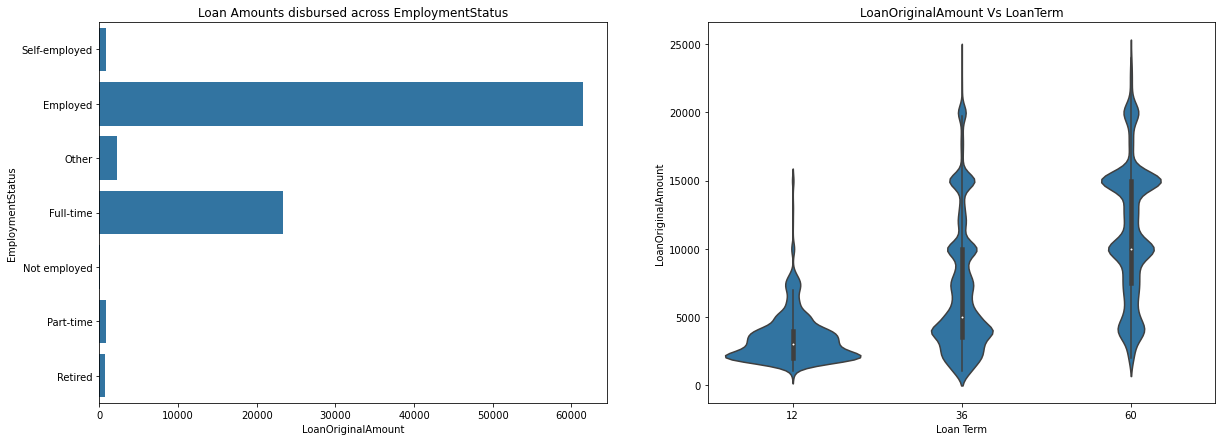

In [19]:
plt.figure(figsize = [20,7])
plt.subplot(1,2,1)
sns.countplot(data=prosperLoanData, y = 'EmploymentStatus', color=base_color)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('EmploymentStatus')
plt.title('Loan Amounts disbursed across EmploymentStatus')
plt.subplot(1,2,2)
sns.violinplot(data=prosperLoanData, x='Term', y='LoanOriginalAmount', color=base_color)
plt.xlabel('Loan Term')
plt.ylabel('LoanOriginalAmount')
plt.title('LoanOriginalAmount Vs LoanTerm');

## Average Loan Original Amount and Monthly Loan Payment across Income Rage

> For loans with terms 36 and 60 months, the loan size increases as the income increases across the income brackets, however, for loans with 12 months term, the loan size is averagely the same across the different income brackets

> However, for montly loan payment amount is similar across all the three loan terms and the amounts increase with increase in income.

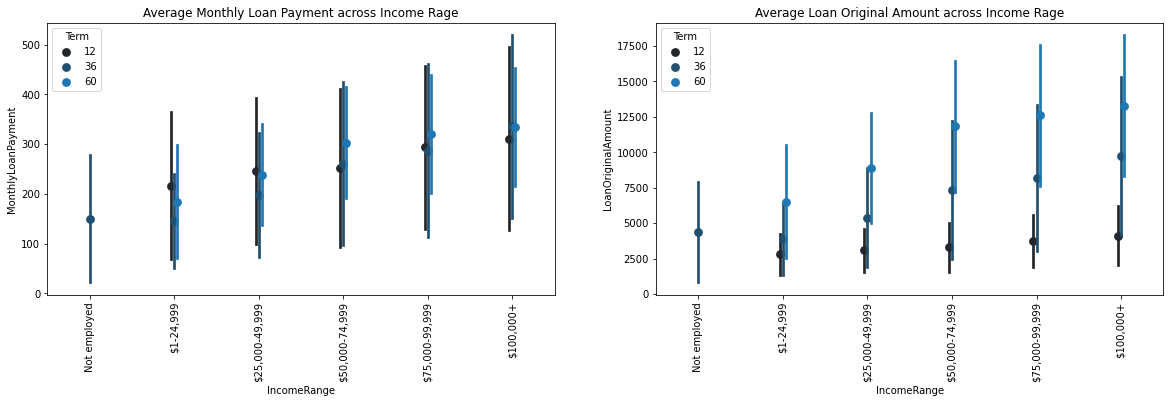

In [20]:
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
sns.pointplot(data=prosperLoanData, x='IncomeRange', y='MonthlyLoanPayment', hue = 'Term', color=base_color, ci='sd',linestyles = "", dodge = True )
plt.xticks(rotation = 90)
plt.xlabel('IncomeRange')
plt.ylabel('MonthlyLoanPayment')
plt.title('Average Monthly Loan Payment across Income Rage')
plt.subplot(1,2,2)
sns.pointplot(data=prosperLoanData, x='IncomeRange', y='LoanOriginalAmount', hue = 'Term', color=base_color, ci='sd',linestyles = "", dodge = True )
plt.xticks(rotation = 90)
plt.xlabel('IncomeRange')
plt.ylabel('LoanOriginalAmount')
plt.title('Average Loan Original Amount across Income Rage');

## Average Loan Original Amount across Loan Terms with Home Onwership

> Home owners applying for loans with 36 or 60 months terms are averagely disbursed bigger loans amounts as compared to non home owners. Averagely the home owners get 2000 dollars more as compared to non home owners.

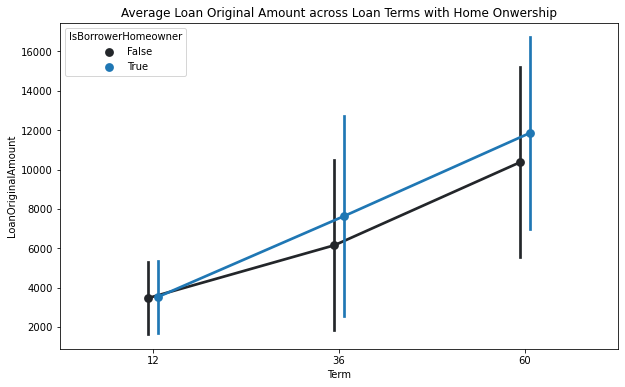

In [21]:
plt.figure(figsize = [10,6])
sns.pointplot(data=prosperLoanData, x='Term', y='LoanOriginalAmount', hue = 'IsBorrowerHomeowner', color=base_color, ci='sd',dodge = True)
plt.xlabel('Term')
plt.ylabel('LoanOriginalAmount')
plt.title('Average Loan Original Amount across Loan Terms with Home Onwership');

## Loan Original Amount Vs Monthly Loan Payment with Loan Term

> Monthly repayment amount increases as the loan original amount also increases. Highest loan with the shaortest repayment plan of 12 months to be disbursed was 10000 dollars. Short term loans of 12 months have a steeper gradient as compared to 36 months and 60 months loans.

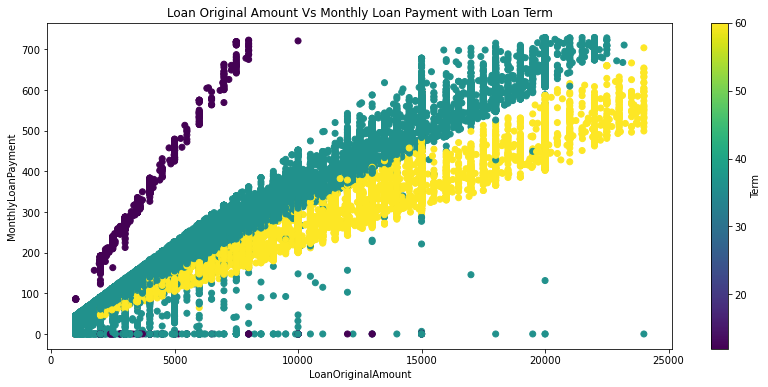

In [22]:
plt.figure(figsize = [14,6])
plt.scatter(data = prosperLoanData, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment',c = 'Term')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('MonthlyLoanPayment')
plt.colorbar(label ='Term')
plt.title('Loan Original Amount Vs Monthly Loan Payment with Loan Term');

## Factors affecting OriginalLoanAmount

> Loan Size is majorly affected by the monthly loan payment with a correlation value of 0.84, other factors that impact loan size are: loan term, StatedMonthlyIncome, CreditSCoreRangeLower and CreditSCoreRangeUpper. The three interest rate variables (BorrowerAPR, BorrowerRate,LenderYield), ListingCatergory and AmountDelinquient negatively impact the loan amount to be disbursed.

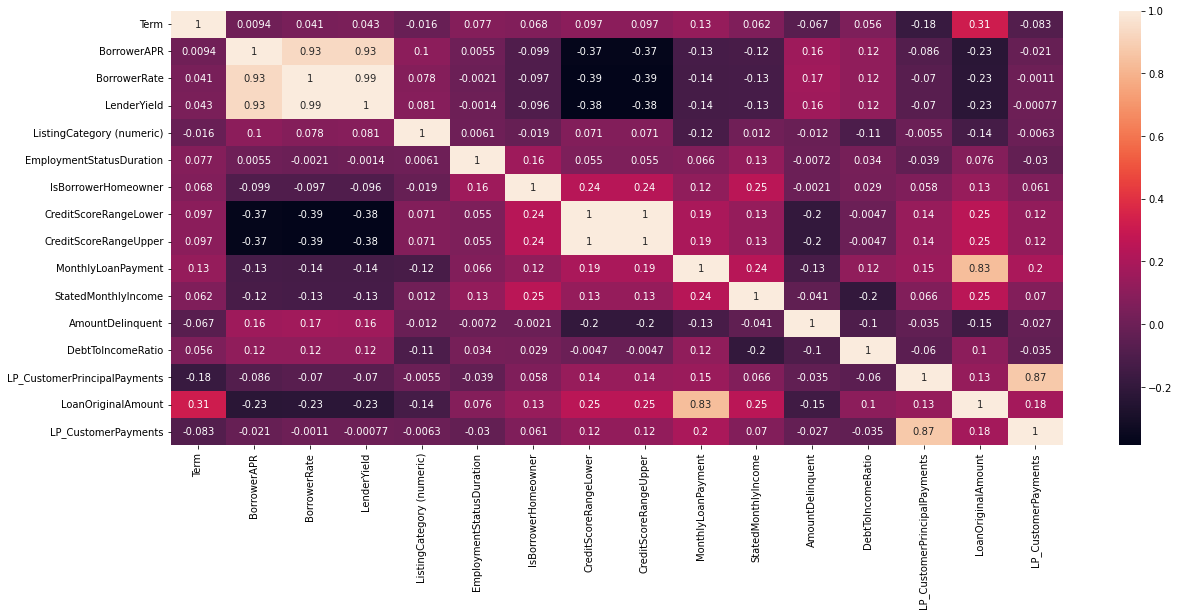

In [23]:
col = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield','ListingCategory (numeric)', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper','MonthlyLoanPayment', 'StatedMonthlyIncome' ,'AmountDelinquent', 'DebtToIncomeRatio', 'LP_CustomerPrincipalPayments', 'LoanOriginalAmount', 'LP_CustomerPayments']

prosperLoanDatacp = prosperLoanData[col]
corrMatrix = prosperLoanDatacp.corr(method = 'kendall')
plt.figure(figsize = (20,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [25]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1027130 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\KAKAI\AppData\Roaming\jupyterlab-desktop\jlab_server\Scripts\jupyter-nbconvert-script.py", line 9, in <module>
    sys.exit(main())
  File "C:\Users\KAKAI\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\KAKAI\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\KAKAI\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\nbconvert\nbconvertapp.py", line 414, in start
    self.convert_notebooks()
  Fi